In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.metrics import mean_absolute_error,mean_squared_error,  r2_score
from pycaret.regression import *
from pycaret.utils import check_metric

In [2]:
path='/data/project/ubrite/hackathon2022/staging_area_teams/project-medvaisor/'

In [3]:
panCancer_train_df = pd.read_csv(f'{path}D2GNets/data/panCancer_train_CGC_657_DR_Drug_features_new_df.csv')
GBM_train_df = pd.read_csv(f'{path}D2GNets/data/GBM_train_CGC_657_DR_Drug_features_new_df.csv')

In [21]:
data = pd.concat([panCancer_train_df,GBM_train_df])

In [5]:
TCGA = data['TCGA_DESC'].value_counts()/data.shape[0]*100

In [6]:
TCGA.sort_index(inplace=True)

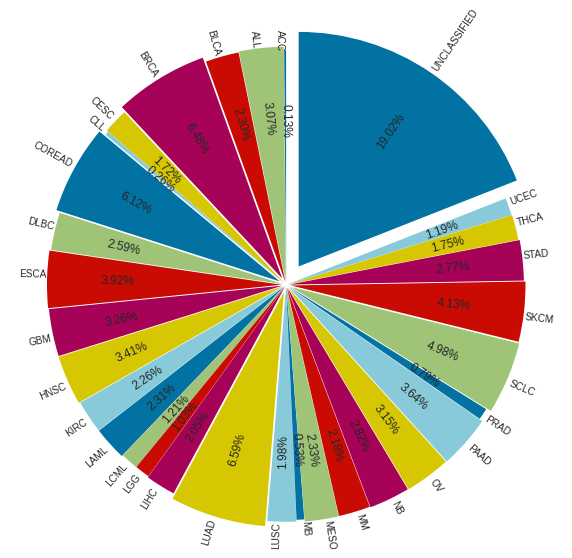

In [9]:
patches, labels, pct_texts = plt.pie(TCGA.values, labels = TCGA.index,
        autopct='%1.2f%%',startangle=90, explode=(TCGA.values)/100,
        rotatelabels=True,pctdistance=0.7, labeldistance=1,
                                    radius=2)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
#plt.title('Spending')
plt.axis('equal')
#plt.tight_layout()
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

In [10]:
# what is the average log(IC50) value for each drug for GBM canter type?
quer1 = data[['TCGA_DESC','DRUG_NAME','LN_IC50']].copy(deep=True)

In [12]:
drug_list = ['Temozolomide', 'Carmustine' ,'Topotecan' ,'Crizotinib' ,'Gefitinib' ,'Bortezomib' ,'Teniposide']

In [13]:
quer1[(quer1['TCGA_DESC']=='GBM')&(quer1['DRUG_NAME'].isin(drug_list))].groupby('DRUG_NAME').mean()

,LN_IC50
DRUG_NAME,
Bortezomib,-5.011429
Carmustine,6.315336
Crizotinib,3.762852
Gefitinib,3.755200
Temozolomide,6.319654
Teniposide,0.956436
Topotecan,0.293909


<AxesSubplot:xlabel='DRUG_NAME'>

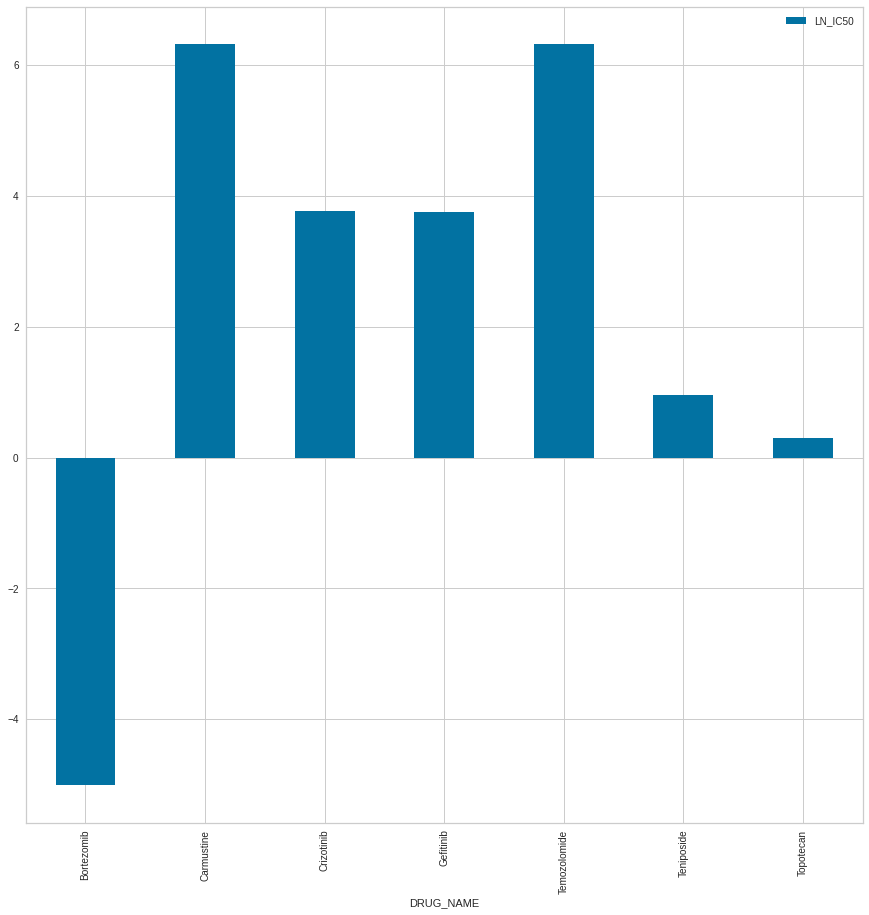

In [16]:
(quer1[(quer1['TCGA_DESC']=='GBM')&(quer1['DRUG_NAME'].isin(drug_list))].groupby('DRUG_NAME').mean()).plot(kind='bar',y='LN_IC50')

<AxesSubplot:title={'center':'LN_IC50'}, xlabel='[DRUG_NAME]'>

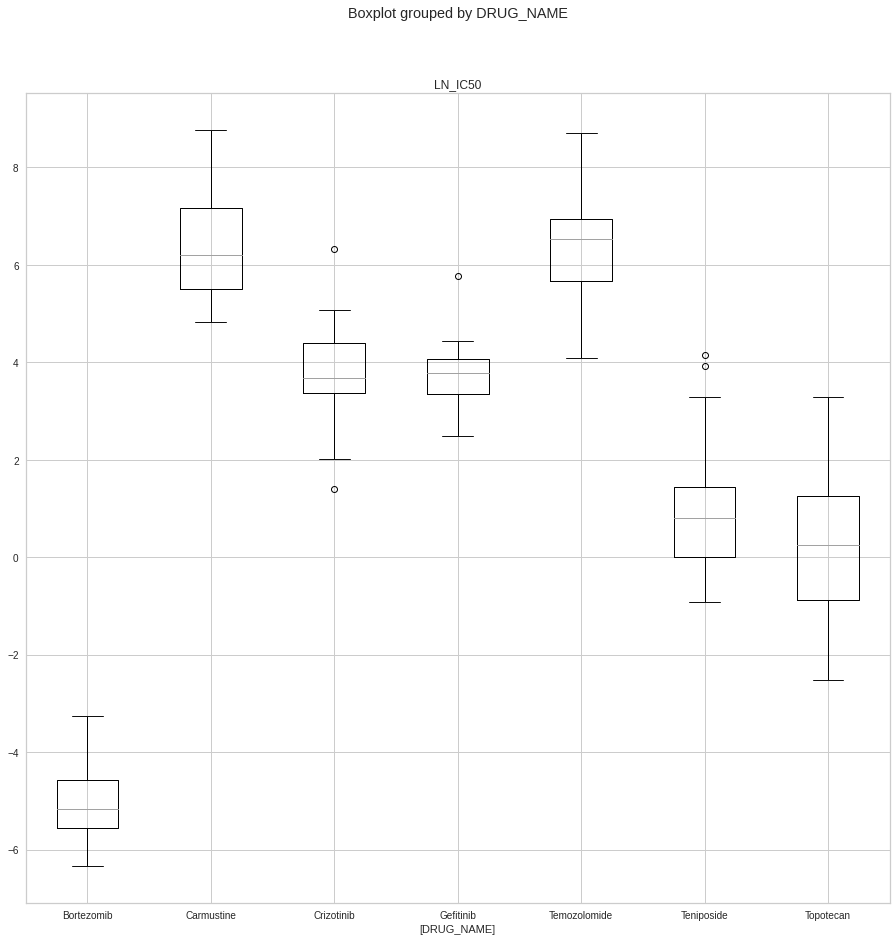

In [19]:
#df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])
(quer1[(quer1['TCGA_DESC']=='GBM')&(quer1['DRUG_NAME'].isin(drug_list))]).boxplot(column=['LN_IC50'],by=['DRUG_NAME'])

In [20]:
GBM_df = quer1[(quer1['TCGA_DESC']=='GBM')&(quer1['DRUG_NAME'].isin(drug_list))]

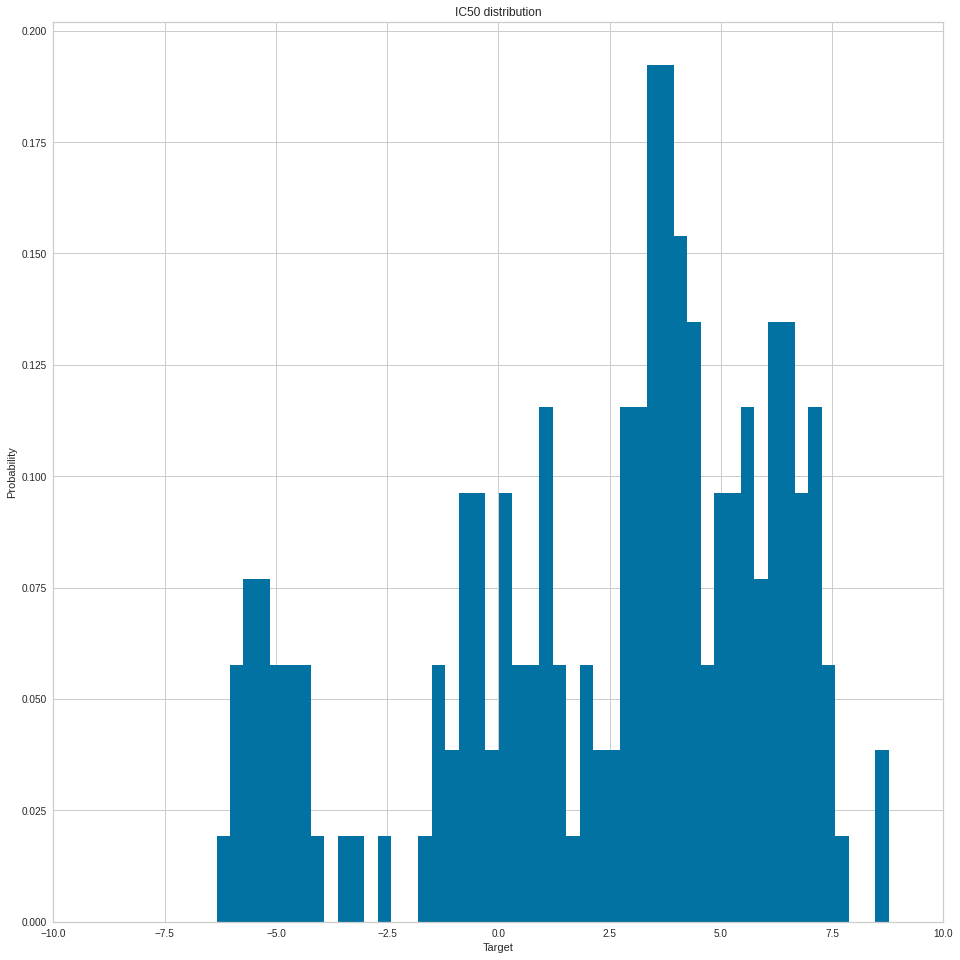

In [28]:
f, (ax0) = plt.subplots(1, 1)

ax0.hist(GBM_df['LN_IC50'].values, bins=50, density=True)
ax0.set_xlim([-10, 10])
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("IC50 distribution")


f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [29]:
repurposing_df = pd.read_csv('../../D2GNets/data/Repurposing.csv')

In [34]:
data['TCGA_DESC'].unique()

array(['BRCA', 'COREAD', 'UNCLASSIFIED', 'MM', 'MB', 'SKCM', 'BLCA',
       'CESC', 'LUAD', 'LUSC', 'SCLC', 'MESO', 'NB', 'PAAD', 'ESCA',
       'HNSC', 'LAML', 'KIRC', 'OV', 'PRAD', 'LCML', 'ALL', 'LGG', 'THCA',
       'STAD', 'DLBC', 'UCEC', 'LIHC', 'CLL', 'ACC', 'GBM'], dtype=object)

In [32]:
repurposing_df['TCGA_DESC']

0       glioblastoma
1       glioblastoma
2       glioblastoma
3       glioblastoma
4       glioblastoma
            ...     
1087    glioblastoma
1088    glioblastoma
1089    glioblastoma
1090    glioblastoma
1091    glioblastoma
Name: TCGA_DESC, Length: 1092, dtype: object

In [35]:
for cn in data['TCGA_DESC'].unique():
    if cn =='GBM':
        repurposing_df[cn]=1
    else:
        repurposing_df[cn]=0

In [36]:
repurposing_df.isna().any().any()

False

In [37]:
repurposing_df.to_csv(f'{path}D2GNets/data/Repurposing.csv',index=False)

In [4]:
repurpose = pd.read_csv('../../D2GNets/results/unseen_predict_repurpose_exp4.csv')

In [8]:
repurpose1 = repurpose[repurpose.columns[-4:]].copy(deep=True)

In [12]:
repurpose1.head()

,TCGA_DESC,SAMPLE_ID,DRUG_NAME,Label
0,glioblastoma,687561,Carbamazepine,3.467422
1,glioblastoma,687561,Buprenorphine,2.096362
2,glioblastoma,687561,Troleandomycin,-0.142082
3,glioblastoma,687561,Clopidogrel,0.645713
4,glioblastoma,687561,Saquinavir,-0.353955


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DRUG_NAME', ylabel='Label'>

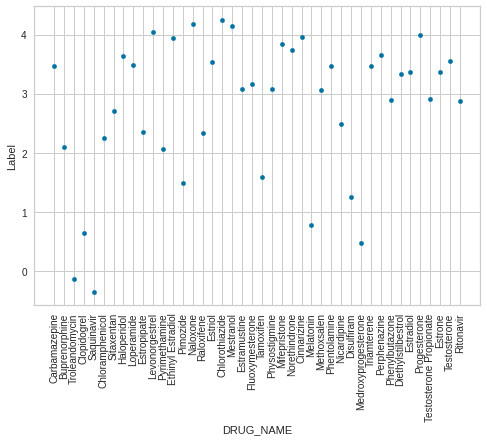

In [15]:
(repurpose1[repurpose1['SAMPLE_ID']==687561]).plot(kind='scatter',x='DRUG_NAME',y='Label',rot=90)

In [16]:
range_df =  pd.read_csv(f'{path}D2GNets/results/Repurposing_drugRange.csv')

<AxesSubplot:>

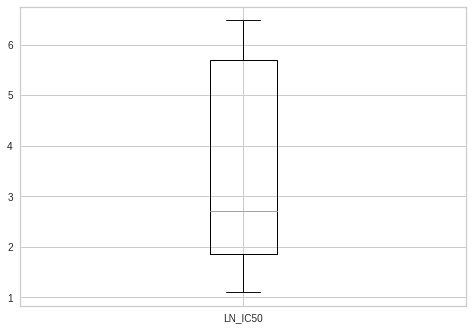

In [19]:
range_df.boxplot(column=['LN_IC50'])

In [26]:
drug_list = ['Temozolomide', 'Carmustine' ,'Topotecan' ,'Crizotinib' ,'Gefitinib' ,'Bortezomib' ,'Teniposide']
data1 = (GBM_train_df[GBM_train_df['DRUG_NAME'].isin(drug_list)])[['DRUG_NAME','LN_IC50']].copy(deep=True)

In [31]:
class Quantile:
    def __init__(self, q):
        self.q = q
        
    def __call__(self, x):
        return x.quantile(self.q)
        # Or using numpy
        # return np.quantile(x.dropna(), self.q)

In [42]:
(
data1
.groupby('DRUG_NAME')
.agg(min_ = ('LN_IC50', Quantile(0.25)),
     max_ = ('LN_IC50', Quantile(0.50)))
).to_csv('../../D2GNets/results/GDSC_MinMax4GBM-Drugs.csv')

In [30]:
data1.groupby('DRUG_NAME').agg(max_=('LN_IC50', ''), min_=('LN_IC50', 'min'))

AttributeError: 'SeriesGroupBy' object has no attribute 'upper_quartile'